# **Not an ideal network**

## Aiming to just get good accuracy even without worrying the number of parameters

  * Just make a naive network. Let us check by having two maxpooling layers. We know it is wrong, but let us take a chance and see how far we can go.
  * Have kernel size of maximum 64 because, MNIST is a relatively small dataset and in my opinion 64 itself is a big number

## Import the Libraries required

In [0]:
# If not installed the Keras, install the Keras using PIP command 
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import numpy to edit/modify/calculate the numerical data
import numpy as np

# With Sequential API, we are telling Keras that we are adding layers one by one
from keras.models import Sequential

# For last layer. Our predictions are output of channels. Not required if we use GAP
from keras.layers import Flatten

# Single most important API. Which convolves over the image
from keras.layers import Convolution2D

# Some utilities. Mainly used for converting the Labels into one hot encoding.
from keras.utils import np_utils

# Finally import the dataset
from keras.datasets import mnist

## Things Related to Dataset


In [0]:
# Load the training data and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


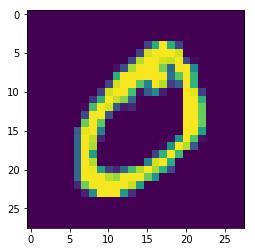

In [0]:
# How many training samples do we have?
print (X_train.shape)

# Let us look at one of the image. If you want to check different images, then just change 
# Index in X_train[]
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
# This line is redundant as our dataset is already in correct SHAPE (Python Shape). However it is 
# good practice to do this
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# We are using the MNIST data, which actually contains the Grascale integer images whos values change from 0-255
# We are converting those float, because in the next few lines we are doing division operation on it
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Zero mean out operation. We are not removing any features here, we are just bringing all the values within 0 to 1
# Cruedly we can think of this as batch normalization (Not exactly but somewhat similar)
X_train /= 255
X_test /= 255

In [0]:
# Do you want to see the labels?
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices (We call it one hot encoding)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# No we can see that labels are in terms of matrices
# You can map label to corresponding column number
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## The main block



In [0]:
# Import activations. We use Relu by default on all layers except layer, where we use Softmax


from keras.layers import Activation, MaxPooling2D

# Let us build the model
model = Sequential() 


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(64, 3, 3, activation='relu')) #24


model.add(MaxPooling2D(pool_size=(2, 2))) #12


model.add(Convolution2D(64, 3, 3, activation='relu')) #10


model.add(Convolution2D(64, 3, 3, activation='relu')) #08

model.add(MaxPooling2D(pool_size=(2, 2))) #4

model.add(Convolution2D(64, 3, 3, activation='relu')) #2

model.add(Convolution2D(10, 2, 2, activation='relu')) #1


model.add(Flatten())


model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 2, 2, 64)          36928     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: Us

In [0]:
# Let us compile the model. We are using Categorical Crossentropy because we are building the classifier
# Adam optimizer is ADAptive Momentum optimizer, which can be considered as superior optimzer considered to 
# Stochastic Gradient Descent

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# In the previous block we have made our model ready. Let us run the code by feeding training data and labels
# Batch-size defines how many samples we are feeding at a time

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 1.2496 - acc: 0.5733
Epoch 2/10
60000/60000 [==============================] - 11s 186us/step - loss: 1.1943 - acc: 0.5872
Epoch 3/10
60000/60000 [==============================] - 10s 168us/step - loss: 1.1837 - acc: 0.5895
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 1.1795 - acc: 0.5905
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: 1.1376 - acc: 0.6082
Epoch 6/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.9041 - acc: 0.7088
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.7127 - acc: 0.7917
Epoch 8/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.7087 - acc: 0.7932
Epoch 9/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.7064 - acc: 0.7939
Epoch 10/10
60000/60000 [==============================] - 11s 184us/step - loss: 

In [0]:
# Predict the score by evaluating the model performance on the test set
score = model.evaluate(X_test, Y_test, verbose=0)

# Print the scores
print(score)

[0.7157764858722687, 0.7923]


## Observations

  * Okay. We reached training accuracy of 80% (around) and Test accuracy of 80%(around)
    * That means network did not overfit, which is good
  * By looking at the accuracy table we can claim that, network still has capacity to get trained. 
    * But we do not want to go further as our aim is 16k model.